In [1]:
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

Using TensorFlow backend.


In [42]:
train_dir = "train_data"
test_dir = "test_data"
train=pd.read_csv('train_cactus.csv')

In [43]:
train.head(5)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [44]:
train['has_cactus'] =train['has_cactus'].astype(str)

In [45]:
train.shape

(17500, 2)

In [47]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=50

In [48]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                target_size=(150,150))


test_generator = datagen.flow_from_directory( directory=test_dir, target_size=(150,150), batch_size=batch_size,
                                             class_mode=None, shuffle=False)

Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 4000 images belonging to 1 classes.


In [37]:
epochs = 15

In [49]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(),metrics=['acc'])
    
history =model.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=validation_generator,validation_steps=50)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7

Epoch 1/15
100/100 [==============================] - 10s 100ms/step - loss: 1.0947 - acc: 0.7934 - val_loss: 0.2850 - val_acc: 0.8908
Epoch 2/15
100/100 [==============================] - 9s 91ms/step - loss: 0.2412 - acc: 0.9088 - val_loss: 0.1659 - val_acc: 0.9384
Epoch 3/15
100/100 [==============================] - 9s 91ms/step - loss: 0.1613 - acc: 0.9398 - val_loss: 0.2153 - val_acc: 0.9328
Epoch 4/15
100/100 [==============================] - 9s 90ms/step - loss: 0.1310 - acc: 0.9482 - val_loss: 0.1660 - val_acc: 0.9468
Epoch 5/15
100/100 [==============================] - 9s 91ms/step - loss: 0.1224 - acc: 0.9526 - val_loss: 0.0930 - val_acc: 0.9644
Epoch 6/15
100/100 [====================

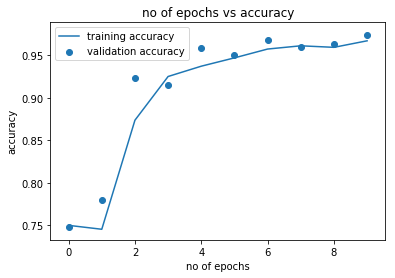

In [28]:
acc=history.history['acc'] 
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

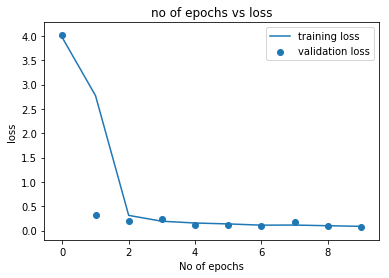

In [29]:
acc=history.history['loss']  
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [ ]:
model.predict_generator(test_generator, steps = 20)